<a href="https://colab.research.google.com/github/Kenilpatel057/CS410firststeps/blob/main/Diabetes%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

Loading the data from .csv file to python

In [ ]:
df=pd.read_csv("/content/d_750.csv")
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

First Five lines of data set

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Decription of Data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Initial correlation and checking for important features

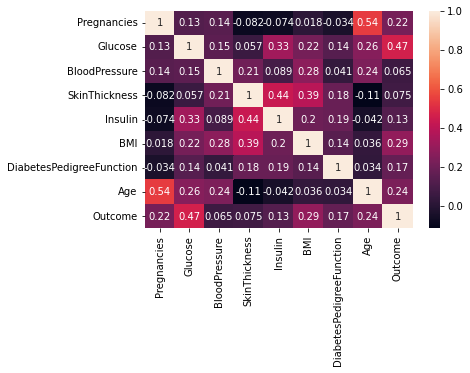

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


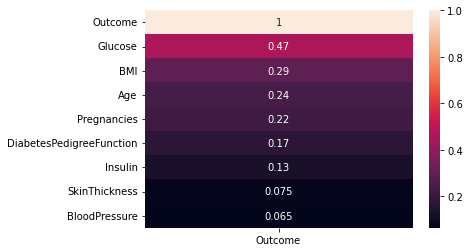

In [ ]:
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
sns.heatmap(correlation, annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

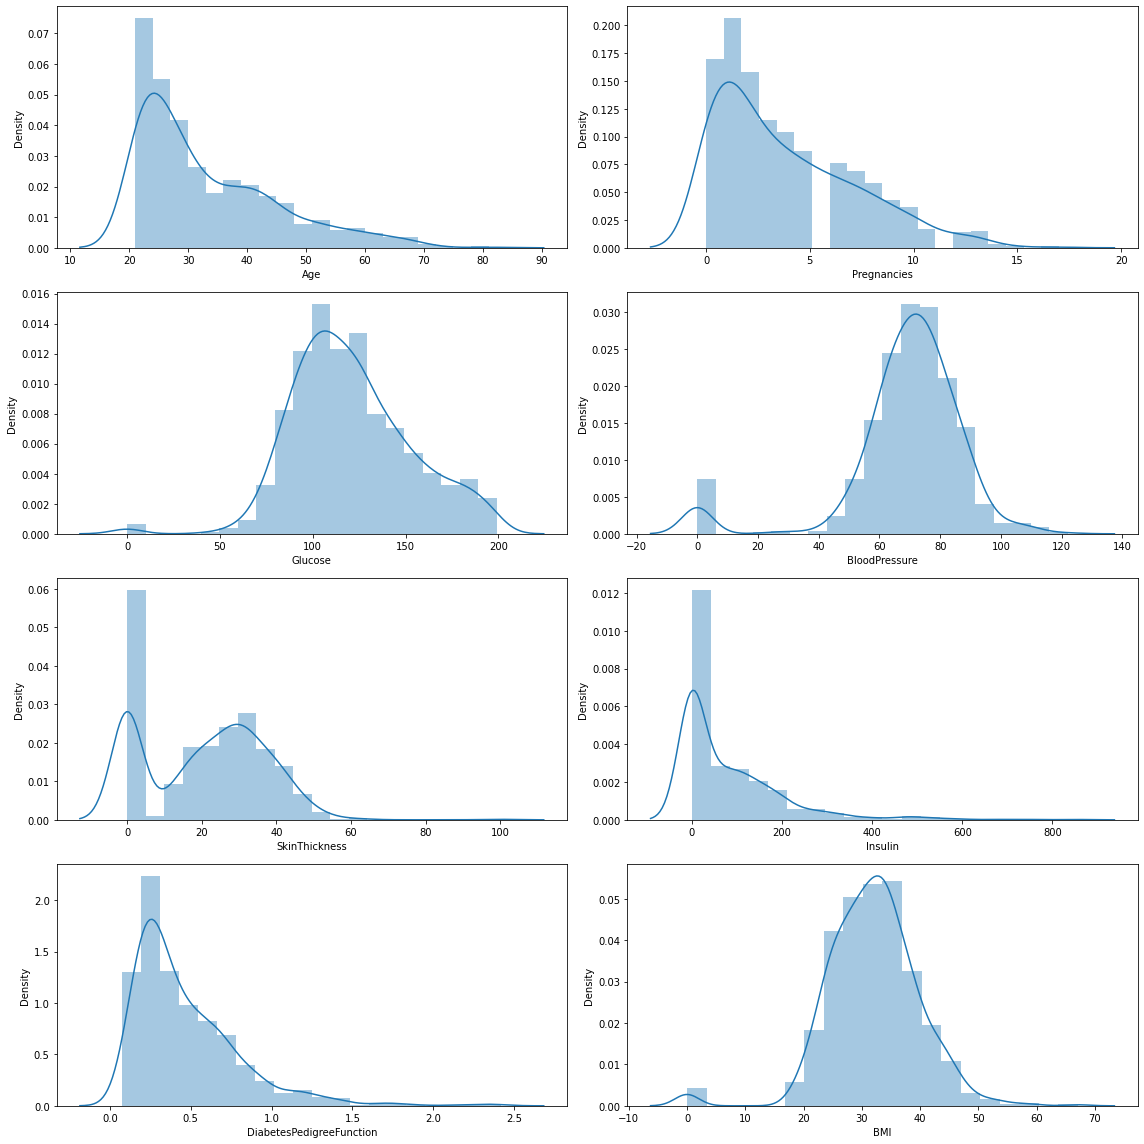

In [238]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



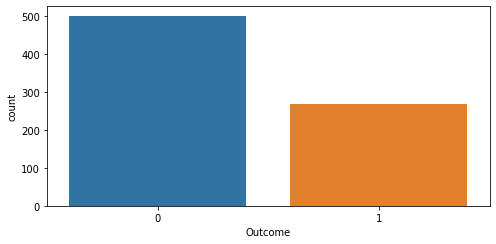

In [239]:
sns.countplot('Outcome',data=df)

Size of Data

In [ ]:
display('balance:',df.Outcome.value_counts(), '----------------')

'balance:'

0    500
1    268
Name: Outcome, dtype: int64

'----------------'

**Checking for zero Values**

In [ ]:
print("zero values of Blood Pressure = ",df[df['BloodPressure']==0].shape[0])
print("zero values of Glucose = ",df[df['Glucose']==0].shape[0])
print("zero values of Skin Thickness = ",df[df['SkinThickness']==0].shape[0])
print("zero values of Insulin = ",df[df['Insulin']==0].shape[0])
print("zero values of BMI = ",df[df['BMI']==0].shape[0])

zero values of Blood Pressure =  35
zero values of Glucose =  5
zero values of Skin Thickness =  227
zero values of Insulin =  374
zero values of BMI =  11


Creating a balanced data set with equal number of 0s and 1s to reduce the bias in data

In [ ]:
# creating a balanced set with sampling for the distribution visualization
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

def random_sampling(df, n):
    random_sample = df.sample(n,replace = False)
    return(random_sample)

df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp])

display('balance:',df_bal.Outcome.value_counts())

'balance:'

1    268
0    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



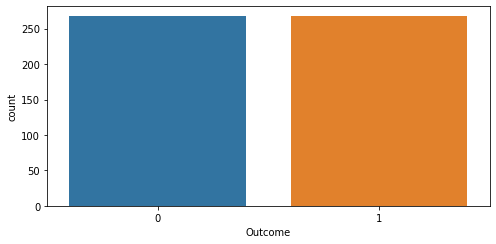

In [262]:
sns.countplot('Outcome',data=df_bal)

Getting rid of 0s in the data from required features and replacing with mean of the data

In [ ]:
df_bal['Glucose'] = df_bal['Glucose'].replace(0,df_bal['BMI'].mean())
df_bal['BloodPressure'] = df_bal['BloodPressure'].replace(0,df_bal['BMI'].mean())
df_bal['SkinThickness'] = df_bal['SkinThickness'].replace(0,df_bal['BMI'].mean())
df_bal['Insulin'] = df_bal['Insulin'].replace(0,df_bal['BMI'].mean())
df_bal['BMI'] = df_bal['BMI'].replace(0,df_bal['BMI'].mean())

In [ ]:
print("zero values of Blood Pressure = ",df_bal[df_bal['BloodPressure']==0].shape[0])
print("zero values of Glucose = ",df_bal[df_bal['Glucose']==0].shape[0])
print("zero values of Skin Thickness = ",df_bal[df_bal['SkinThickness']==0].shape[0])
print("zero values of Insulin = ",df_bal[df_bal['Insulin']==0].shape[0])
print("zero values of BMI = ",df_bal[df_bal['BMI']==0].shape[0])

zero values of Blood Pressure =  0
zero values of Glucose =  0
zero values of Skin Thickness =  0
zero values of Insulin =  0
zero values of BMI =  0


Taking a look at cleaned data

In [ ]:
df_bal.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.027985,126.624946,71.167585,30.404572,103.282865,32.856448,0.492825,34.011194,0.500000
std,3.473418,32.106543,14.567689,8.969005,113.968536,6.982556,0.355759,11.706691,0.500467
min,0.000000,32.492724,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,64.000000,25.000000,32.492724,27.875000,0.247000,24.000000,0.000000
50%,3.000000,123.000000,72.000000,32.492724,37.000000,32.400000,0.382500,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,140.000000,36.725000,0.672250,41.000000,1.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,72.000000,1.000000


Final correlation to see how the features match the outcome

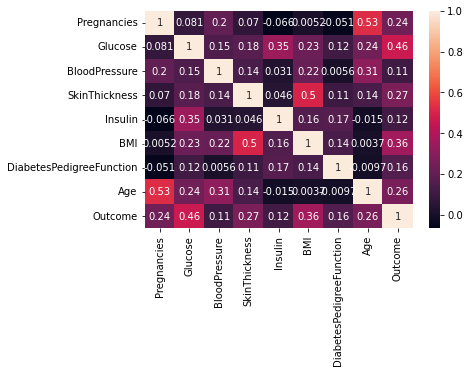

In [ ]:
corrmat=df_bal.corr()
sns.heatmap(corrmat, annot=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.241396,0.463734,0.109722,0.271059,0.121061,0.362465,0.162271,0.261289,1.000000
Glucose,0.081125,1.000000,0.154523,0.179442,0.349559,0.228886,0.117066,0.244064,0.463734
BMI,0.005185,0.228886,0.217139,0.502844,0.159912,1.000000,0.140893,0.003720,0.362465
SkinThickness,0.070169,0.179442,0.140806,1.000000,0.045873,0.502844,0.106019,0.138702,0.271059
Age,0.525360,0.244064,0.313528,0.138702,-0.015043,0.003720,-0.009707,1.000000,0.261289
Pregnancies,1.000000,0.081125,0.201973,0.070169,-0.066029,0.005185,-0.051109,0.525360,0.241396
DiabetesPedigreeFunction,-0.051109,0.117066,0.005606,0.106019,0.173050,0.140893,1.000000,-0.009707,0.162271
Insulin,-0.066029,0.349559,0.030660,0.045873,1.000000,0.159912,0.173050,-0.015043,0.121061
BloodPressure,0.201973,0.154523,1.000000,0.140806,0.030660,0.217139,0.005606,0.313528,0.109722


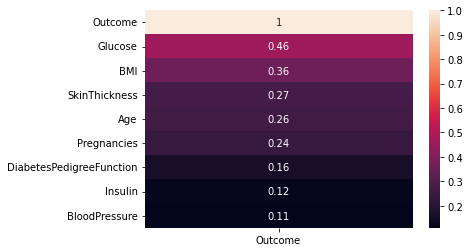

In [ ]:
display(df_bal.corr().sort_values('Outcome', ascending=False))
correlation = df_bal.corr().sort_values('Outcome', ascending=False)[['Outcome']]
sns.heatmap(correlation, annot=True)

Checking for Outliers

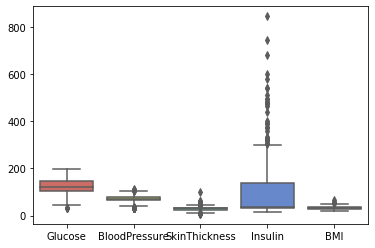

In [ ]:
import seaborn as sb
sb.boxplot(data=df_bal[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], palette='hls')

In [ ]:
from scipy import stats
z_scores = stats.zscore(df_bal)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df_bal[filtered_entries]

In [ ]:
print(df_new['Insulin'].quantile(0.10))
print(df_new['Insulin'].quantile(0.90))

32.49272388059701
208.80000000000007


In [ ]:
df_new["Insulin"] = np.where(df_new["Insulin"] > 200.00, 200.00,df_new['Insulin'])
print(df_new['Insulin'].skew())

0.8393886863725167


<ipython-input-43-e57c55afc325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Insulin"] = np.where(df_new["Insulin"] > 200.00, 200.00,df_new['Insulin'])


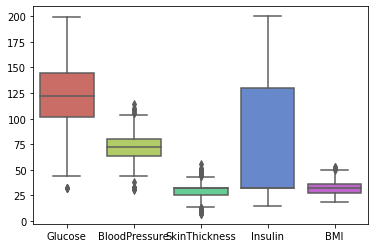

In [ ]:
sb.boxplot(data=df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], palette='hls')

In [ ]:
df_new.shape

(505, 9)

In [ ]:
df_new.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,4.087129,125.172220,71.273926,29.993792,81.979523,32.540324,0.463768,33.845545,0.489109
std,3.415118,31.494847,14.402432,8.192781,63.405133,6.616879,0.293587,11.415837,0.500377
min,0.000000,32.492724,30.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,25.000000,32.492724,27.700000,0.246000,24.000000,0.000000
50%,3.000000,122.000000,72.000000,32.492724,32.492724,32.300000,0.370000,31.000000,0.000000
75%,6.000000,145.000000,80.000000,32.492724,130.000000,36.500000,0.652000,41.000000,1.000000
max,14.000000,199.000000,114.000000,56.000000,200.000000,53.200000,1.441000,69.000000,1.000000


In [ ]:
X = df_new.drop(columns='Outcome') # Features
y = df_new['Outcome'] # Lables

In [ ]:
X.shape

(505, 8)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)


In [267]:
X_train.shape


(404, 8)

In [268]:
X_test.shape

(101, 8)

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
397,0,131.0,66.000000,40.000000,32.492724,34.3,0.196,22
84,5,137.0,108.000000,32.492724,32.492724,48.8,0.227,37
15,7,100.0,32.492724,32.492724,32.492724,30.0,0.484,32
627,0,132.0,78.000000,32.492724,32.492724,32.4,0.393,21
355,9,165.0,88.000000,32.492724,32.492724,30.4,0.302,49


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

columns = X_train.columns
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns = columns)
X_train_std.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.173748,-0.249955,0.896214,2.014498,1.808547,2.013977,0.278731,-0.220125
1,-0.879401,-1.469435,-0.734534,1.420777,-0.557792,1.664383,0.713046,-0.918991
2,-0.879401,-1.031673,-0.055056,0.114592,-0.799209,-0.326784,-0.528343,-0.918991
3,1.769730,0.094001,0.352631,-0.241640,0.594242,0.509202,-0.648036,0.478740
4,1.181034,-0.812792,0.216736,1.183289,1.808547,1.041194,0.654909,0.828173
5,0.592339,-0.062342,0.080840,0.291844,-0.799209,-0.752376,-0.347093,-0.394842
6,-0.585053,-0.812792,-0.326847,-1.191593,0.096065,0.053210,1.359389,-0.482200
7,-0.585053,0.469226,-0.870430,0.470824,0.687650,-1.086771,0.784862,-0.831632
8,1.181034,0.875719,0.488527,0.233336,-0.799209,-0.022789,-0.090608,1.002889
9,1.475382,0.938257,1.032109,0.291844,-0.799209,-1.177969,-0.819026,1.701754


Applying Logistic Regression with random Parameters

In [ ]:
model = LogisticRegression(random_state=0, n_jobs=-1, max_iter=100000, C = 1, penalty='l2', solver='liblinear')
model.fit(X_train_std,y_train)
accuracy = model.score(X_test_std, y_test)
print("Accuracy: {}".format(accuracy*100.0))

Accuracy: 73.26732673267327


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Hyperparameter Tuning

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
print(c_space)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 10)
 
logreg_cv.fit(X_train_std, y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

[1.00000000e-05 8.48342898e-05 7.19685673e-04 6.10540230e-03
 5.17947468e-02 4.39397056e-01 3.72759372e+00 3.16227766e+01
 2.68269580e+02 2.27584593e+03 1.93069773e+04 1.63789371e+05
 1.38949549e+06 1.17876863e+07 1.00000000e+08]
Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7447560975609757


In [ ]:
model = LogisticRegression(random_state=0, n_jobs=-1, max_iter=100000, C = 8.48342898e-05, penalty='l2', solver='liblinear')
model.fit(X_train_std,y_train)
accuracy = model.score(X_test_std, y_test)
print("Accuracy: {}".format(accuracy*100.0))

Accuracy: 78.21782178217822


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



Model Scores

In [ ]:
from sklearn.metrics import classification_report as CR
results = model.predict(X_test_std)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        55
           1       0.75      0.78      0.77        46

    accuracy                           0.78       101
   macro avg       0.78      0.78      0.78       101
weighted avg       0.78      0.78      0.78       101



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
y_pred = model.predict(X_test_std)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("Accuracy_score is: {}".format(accuracy_score(y_test, y_pred))) 
print("Precision_score is: {}".format(precision_score(y_test, y_pred))) # Precision = TruePositives / (TruePositives + FalsePositives).
print("Recall_score is: {}".format(recall_score(y_test, y_pred))) # Recall = TruePositives / (TruePositives + FalseNegatives) 
                                                                # quantifies the number of positive class predictions made out of all positive examples in the dataset.
print("F1_score is: {}".format(f1_score(y_test, y_pred))) # provides a single score that balances both the concerns of precision and recall in one number.
#Precision: Appropriate when minimizing false positives is the focus.
#Recall: Appropriate when minimizing false negatives is the focus.

Accuracy_score is: 0.7821782178217822
Precision_score is: 0.75
Recall_score is: 0.782608695652174
F1_score is: 0.7659574468085107


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


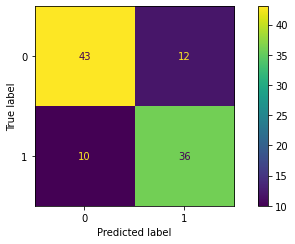

In [ ]:
print("\n")
plot_confusion_matrix(model, X_test_std, y_test)

ROC curve for Logistic Regression

In [245]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification



y_score = model.predict_proba(X_test_std)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Learning Curve for Logistic Regression

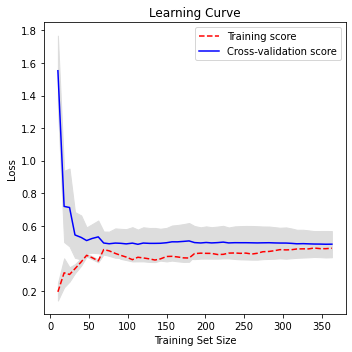

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import learning_curve

# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C = 10),
                                            X_train_std, y_train, cv=10, scoring='neg_log_loss', n_jobs=-1,
                                            # 50 different sizes of the training set
                                            train_sizes=np.linspace(0.01, 1.0, 50))

# Creating means and standard deviations of training set scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

# Creating means and standard deviations of test set scores
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="Blue", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Loss"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

Accuracy Curve

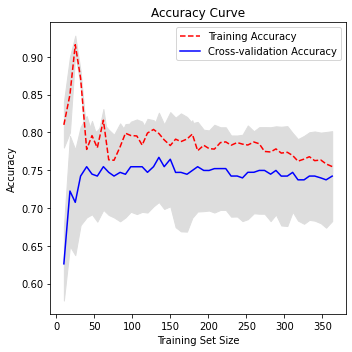

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import learning_curve


# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(),
                                            X_train_std, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                            # 50 different sizes of the training set
                                            train_sizes=np.linspace(0.01, 1.0, 50))

# Creating means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Creating means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training Accuracy")
plt.plot(train_sizes, test_mean, color="Blue", label="Cross-validation Accuracy")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Accuracy Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

Applying Support Vector Machine model

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm = SVC(kernel='rbf', probability=True)
svm_clf = GridSearchCV(svm, param_grid, cv=10)

Hyperparameter Tuning

In [ ]:
svm_fit = svm_clf.fit(X_train_std,y_train)
#X_train, X_test,y_train, y_test
svm_clf.best_params_ 

{'C': 10, 'gamma': 0.01}

In [270]:
svm_predict = svm_clf.predict(X_test_std)   

Scores For SVM

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("Accuracy_score is: {}".format(accuracy_score(y_test, svm_predict))) 
print("Precision_score is: {}".format(precision_score(y_test, svm_predict))) # Precision = TruePositives / (TruePositives + FalsePositives).
print("Recall_score is: {}".format(recall_score(y_test, svm_predict))) # Recall = TruePositives / (TruePositives + FalseNegatives) 
                                                                # quantifies the number of positive class predictictions made out of all positive examples in the dataset.
print("F1_score is: {}".format(f1_score(y_test, svm_predict))) # provides a single score that balances both the concerns of precision and recall in one number.
#Precision: Appropriate when minimizing false positives is the focus.
#Recall: Appropriate when minimizing false negatives is the focus.

Accuracy_score is: 0.8217821782178217
Precision_score is: 0.8043478260869565
Recall_score is: 0.8043478260869565
F1_score is: 0.8043478260869565


Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



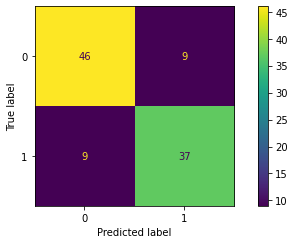

In [273]:
plot_confusion_matrix(svm_clf, X_test_std, y_test)

ROC for SVM

In [ ]:
import plotly.express as px
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification



y_score = svm_clf.predict_proba(X_test_std)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()


In [ ]:
from sklearn.metrics import classification_report as CR
results = svm_clf.predict(X_test_std)
print(CR(y_test,results))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        55
           1       0.80      0.80      0.80        46

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101



In [271]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test,svm_predict)
print(svm_accuracy)

0.8217821782178217


Learning Curve for SVM

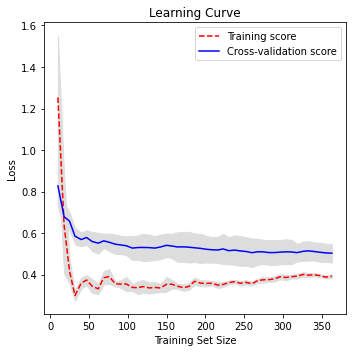

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import learning_curve


# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train_std, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.01, 1.0, 50),
                                                     n_jobs=1,scoring='neg_log_loss')

# Creating means and standard deviations of training set scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

# Creating means and standard deviations of test set scores
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="Blue", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Loss"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

Accuracy Curve

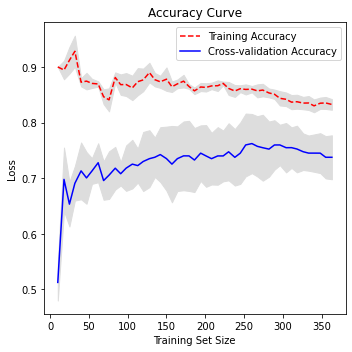

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import learning_curve


# Ploting Learning Curve
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train_std, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.01, 1.0, 50),
                                                     n_jobs=1,scoring='accuracy')

# Creating means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Creating means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Drawing lines
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training Accuracy")
plt.plot(train_sizes, test_mean, color="Blue", label="Cross-validation Accuracy")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Accuracy Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Loss"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

Comparision of ROC curves of both Learning Models

---



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.



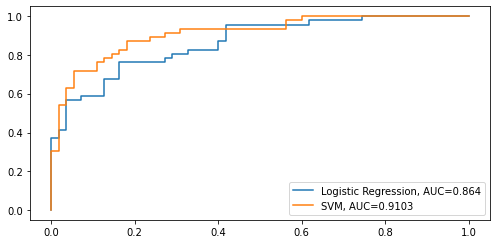

In [227]:
from sklearn import metrics
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve

model.fit(X_test_std, y_test)
y_pred = model.predict_proba(X_test_std)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.legend()

#fit logistic regression model and plot ROC curve

svm_clf.fit(X_test_std, y_test)
y_pred = svm_clf.predict_proba(X_test_std)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))
plt.legend()

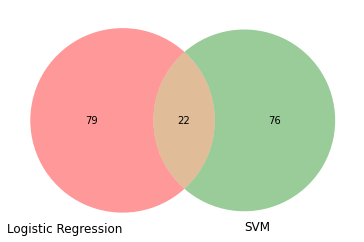

In [242]:
## for more visualizations, graphs and analytics https://drivenn.io/ ##

## reference ##
## https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305
## https://towardsdatascience.com/introducing-basic-venn-diagram-python-package-vennfig-fa3f8e4dcb36

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
 
# Add Data and label names - Group A, Congurence, Group B
venn2(subsets = (79 , 76, 22), set_labels = ('Logistic Regression', 'SVM'))
plt.show()
